In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test

In [2]:
PATH = "/kaggle/input/amp-parkinsons-disease-progression-prediction/"

proteins_df = pd.read_csv(PATH + 'train_proteins.csv')
peptide_df = pd.read_csv(PATH + 'train_peptides.csv')
clinical_df = pd.read_csv(PATH + 'train_clinical_data.csv')

In [3]:
clinical_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [4]:
clinical_df.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


In [5]:
clinical_df['patient_id'].unique()

array([   55,   942,  1517,  1923,  2660,  3636,  3863,  4161,  4172,
        4923,  5027,  5036,  5178,  5645,  5742,  6054,  6211,  6420,
        7051,  7117,  7151,  7265,  7508,  7568,  7832,  7886,  8344,
        8699, 10053, 10138, 10174, 10541, 10715, 10718, 11459, 11686,
       11928, 12516, 12636, 12703, 12755, 12931, 13360, 13368, 13618,
       13804, 13852, 13968, 14035, 14124, 14242, 14270, 14344, 14450,
       14811, 15009, 15245, 15504, 15590, 16238, 16347, 16566, 16574,
       16778, 16931, 17154, 17201, 17414, 17727, 18183, 18204, 18553,
       18560, 19088, 20212, 20216, 20352, 20404, 20460, 20581, 20664,
       20707, 20791, 20792, 21126, 21537, 21729, 22126, 22623, 23175,
       23192, 23244, 23391, 23636, 24278, 24690, 24818, 24820, 24911,
       25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210, 26809,
       27079, 27300, 27464, 27468, 27607, 27715, 27872, 27893, 27971,
       27987, 28327, 28342, 28818, 29313, 29417, 30119, 30155, 30416,
       30894, 30951,

In [6]:
clinical_df[clinical_df['patient_id'] == 55]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
8,55_36,55,36,17.0,18.0,51.0,0.0,On
9,55_42,55,42,12.0,20.0,41.0,0.0,On


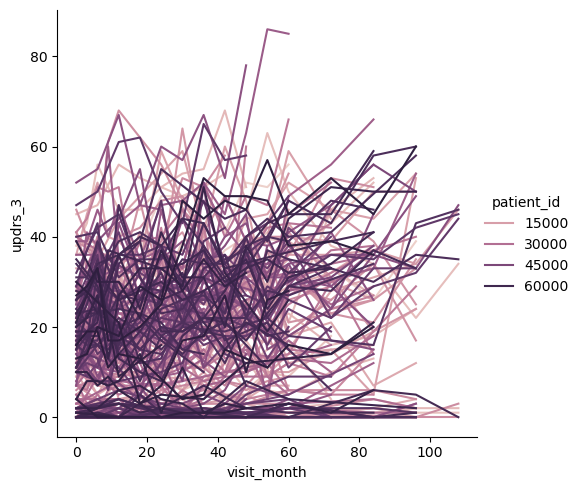

In [7]:
sns.relplot(data=clinical_df,x='visit_month',y='updrs_3',hue="patient_id",kind='line')

In [8]:
proteins_df

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [9]:
proteins_df['UniProt'].unique()

array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
       'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
       'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
       'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
       'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
       'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
       'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
       'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
       'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
       'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
       'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
       'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
       'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
       'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P063

In [10]:
def find_patient(id=55):
    x = proteins_df[proteins_df['patient_id'] == id]
    x = x[x['visit_month'] == 0]
    return x

example_df=find_patient()
example_df

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
214,55_0,0,55,Q9UBX5,60912.6
215,55_0,0,55,Q9UHG2,408698.0
216,55_0,0,55,Q9UNU6,29758.8
217,55_0,0,55,Q9Y646,23833.7


    visit_id  visit_month  patient_id UniProt       NPX
0       55_0            0          55  O00391   11254.3
1       55_0            0          55  O00533  732430.0
2       55_0            0          55  O00584   39585.8
3       55_0            0          55  O14498   41526.9
4       55_0            0          55  O14773   31238.0
..       ...          ...         ...     ...       ...
214     55_0            0          55  Q9UBX5   60912.6
215     55_0            0          55  Q9UHG2  408698.0
216     55_0            0          55  Q9UNU6   29758.8
217     55_0            0          55  Q9Y646   23833.7
218     55_0            0          55  Q9Y6R7   18953.5

[219 rows x 5 columns]


<AxesSubplot:xlabel='NPX', ylabel='UniProt'>

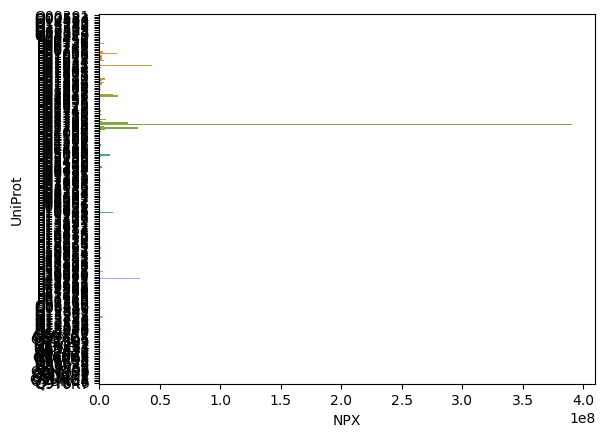

In [11]:
example_df = find_patient()
print(example_df)
sns.barplot(data=example_df, y="UniProt", x= "NPX")

In [12]:
peptide_df

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26
